In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns 

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

df=pd.read_csv('./data/data_preprocessed.csv',index_col=0)
data = df.iloc[:,:-1]
target = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,target,
                                                 test_size=0.2,
                                                 random_state=1234,
                                                 shuffle=True,
                                                 stratify=target)

y_trainOHE = pd.get_dummies(y_train)
y_testOHE = pd.get_dummies(y_test)

### Modeling
```
1. tf_low
2. tf_high
3. torch_low
4. torch_high
```

In [2]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,...,histogram_number_of_peaks,histogram_mode,histogram_mean,histogram_median,histogram_variance,severe_decelerations,prolongued_decelerations,histogram_number_of_zeroes,histogram_tendency,fetal_health
0,-0.928571,-0.333333,0.000000,-0.8,0.0,0.827586,-0.7,3.909091,-0.806452,-0.055556,...,-0.25,-1.000000,0.05,-0.947368,3.000000,0.0,0.0,0.0,1.0,2.0
1,-0.071429,0.666667,0.000000,0.4,1.0,-1.103448,0.9,0.000000,0.483871,0.992063,...,0.75,0.105263,0.00,0.052632,0.227273,0.0,0.0,1.0,0.0,1.0
2,0.000000,0.166667,0.000000,0.8,1.0,-1.137931,0.9,0.000000,0.967742,0.992063,...,0.50,0.105263,-0.05,-0.052632,0.272727,0.0,0.0,1.0,0.0,1.0
3,0.071429,0.166667,0.000000,0.8,1.0,-1.137931,1.2,0.000000,2.516129,0.785714,...,2.00,-0.105263,-0.10,-0.105263,0.272727,0.0,0.0,0.0,1.0,1.0
4,-0.071429,0.833333,0.000000,0.8,0.0,-1.137931,1.2,0.000000,2.016129,0.785714,...,1.50,-0.105263,0.00,-0.052632,0.181818,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.500000,-0.333333,0.000000,0.6,0.0,1.034483,-1.0,2.272727,-0.032258,-0.436508,...,0.25,0.736842,0.70,0.684211,-0.227273,0.0,0.0,0.0,0.0,2.0
2122,0.500000,-0.166667,0.000000,0.6,0.0,1.000000,-0.8,2.000000,-0.048387,-0.023810,...,0.75,0.684211,0.60,0.631579,-0.181818,0.0,0.0,0.0,1.0,2.0
2123,0.500000,-0.166667,0.000000,0.6,0.0,1.034483,-0.8,1.818182,-0.209677,-0.007937,...,0.50,0.736842,0.60,0.684211,-0.136364,0.0,0.0,0.0,1.0,2.0
2124,0.500000,-0.166667,0.000000,0.4,0.0,1.000000,-0.8,2.454545,-0.064516,-0.023810,...,0.75,0.684211,0.55,0.631579,-0.136364,0.0,0.0,0.0,1.0,2.0


In [3]:
# tensorflow low
import tensorflow as tf

x = tf.constant(x_train,tf.float32)
y = tf.constant(y_trainOHE,tf.float32)

initX = tf.initializers.GlorotUniform()
w1 = tf.Variable(initX(shape = [21,64])) 
b1 = tf.Variable(initX(shape = [64]))

w2 = tf.Variable(initX(shape = [64,32])) 
b2 = tf.Variable(initX(shape = [32]))

w3 = tf.Variable(initX(shape = [32,3])) 
b3 = tf.Variable(initX(shape = [3]))

def cost():
    z1 = tf.matmul(x,w1) + b1
    x_hat_1 = tf.nn.relu(z1)
    
    z2 = tf.matmul(x_hat_1,w2) + b2
    x_hat_2 = tf.nn.relu(z2)
    
    z3 = tf.matmul(x_hat_2,w3) + b3
    c_i = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=z3)
    c = tf.reduce_mean(c_i)
    return c

def hxFn(x_data):
    xd = tf.constant(x_data,tf.float32)
    z1 = tf.matmul(xd,w1) + b1
    x_hat_1 = tf.nn.relu(z1)
    
    z2 = tf.matmul(x_hat_1,w2) + b2
    x_hat_2 = tf.nn.relu(z2)
    
    z3 = tf.matmul(x_hat_2,w3) + b3
    hx = tf.nn.softmax(z3)
    return hx.numpy().argmax(axis=1)

optimzier = tf.keras.optimizers.Adam(learning_rate=0.01)

for i in range(1000):
    optimzier.minimize(cost, var_list=[w1,w2,w3,b1,b2,b3])
    curent_acc = accuracy_score(hxFn(x)+[1],y_train)
    print(i, 'cost',cost().numpy() ,f"acc => {curent_acc}" )

C:\ProgramData\Anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


0 cost 1.0695263 acc => 0.6105882352941177
1 cost 0.8102042 acc => 0.7794117647058824
2 cost 0.80170566 acc => 0.7794117647058824
3 cost 0.71441895 acc => 0.7864705882352941
4 cost 0.6566856 acc => 0.8035294117647059
5 cost 0.5821768 acc => 0.83
6 cost 0.4677715 acc => 0.841764705882353
7 cost 0.418151 acc => 0.8535294117647059
8 cost 0.40674502 acc => 0.8582352941176471
9 cost 0.3909798 acc => 0.8652941176470588
10 cost 0.37478387 acc => 0.8670588235294118
11 cost 0.3576523 acc => 0.8688235294117647
12 cost 0.3423408 acc => 0.8717647058823529
13 cost 0.32784697 acc => 0.87
14 cost 0.31344172 acc => 0.8729411764705882
15 cost 0.29862568 acc => 0.8764705882352941
16 cost 0.2972246 acc => 0.8717647058823529
17 cost 0.27887923 acc => 0.8782352941176471
18 cost 0.26932678 acc => 0.8847058823529412
19 cost 0.27357823 acc => 0.8852941176470588
20 cost 0.2619518 acc => 0.89
21 cost 0.25927103 acc => 0.8917647058823529
22 cost 0.24827132 acc => 0.8964705882352941
23 cost 0.25283098 acc => 0.89

184 cost 0.026773604 acc => 0.9929411764705882
185 cost 0.026357621 acc => 0.9941176470588236
186 cost 0.026156122 acc => 0.9935294117647059
187 cost 0.025954505 acc => 0.9935294117647059
188 cost 0.025730357 acc => 0.9935294117647059
189 cost 0.025290541 acc => 0.9935294117647059
190 cost 0.024837485 acc => 0.9947058823529412
191 cost 0.024456605 acc => 0.9958823529411764
192 cost 0.024210641 acc => 0.9941176470588236
193 cost 0.024076328 acc => 0.9935294117647059
194 cost 0.02386918 acc => 0.9947058823529412
195 cost 0.023648757 acc => 0.9947058823529412
196 cost 0.02331814 acc => 0.9935294117647059
197 cost 0.02298458 acc => 0.9947058823529412
198 cost 0.02260628 acc => 0.9958823529411764
199 cost 0.02223051 acc => 0.9952941176470588
200 cost 0.021983296 acc => 0.9964705882352941
201 cost 0.021809293 acc => 0.9952941176470588
202 cost 0.02171494 acc => 0.9952941176470588
203 cost 0.021578895 acc => 0.9952941176470588
204 cost 0.021467015 acc => 0.9952941176470588
205 cost 0.02131445

359 cost 0.0070437486 acc => 0.9982352941176471
360 cost 0.006999183 acc => 0.9970588235294118
361 cost 0.0069745593 acc => 0.9982352941176471
362 cost 0.0069188927 acc => 0.9970588235294118
363 cost 0.0068526426 acc => 0.9976470588235294
364 cost 0.0068296054 acc => 0.9976470588235294
365 cost 0.0067884903 acc => 0.9970588235294118
366 cost 0.0067664157 acc => 0.9976470588235294
367 cost 0.006735944 acc => 0.9976470588235294
368 cost 0.006713538 acc => 0.9976470588235294
369 cost 0.0066780583 acc => 0.9970588235294118
370 cost 0.006656599 acc => 0.9976470588235294
371 cost 0.006631695 acc => 0.9970588235294118
372 cost 0.006613458 acc => 0.9976470588235294
373 cost 0.0065866862 acc => 0.9970588235294118
374 cost 0.006557131 acc => 0.9976470588235294
375 cost 0.0065387934 acc => 0.9970588235294118
376 cost 0.006552002 acc => 0.9976470588235294
377 cost 0.0065589063 acc => 0.9970588235294118
378 cost 0.006541795 acc => 0.9982352941176471
379 cost 0.0064962367 acc => 0.9976470588235294
3

534 cost 0.004333136 acc => 0.9976470588235294
535 cost 0.0043372875 acc => 0.9988235294117647
536 cost 0.0043570586 acc => 0.9976470588235294
537 cost 0.0043681767 acc => 0.9988235294117647
538 cost 0.004400625 acc => 0.9976470588235294
539 cost 0.004419835 acc => 0.9988235294117647
540 cost 0.0044362247 acc => 0.9982352941176471
541 cost 0.0044463947 acc => 0.9982352941176471
542 cost 0.004441113 acc => 0.9982352941176471
543 cost 0.004420292 acc => 0.9988235294117647
544 cost 0.0043598614 acc => 0.9982352941176471
545 cost 0.004315832 acc => 0.9988235294117647
546 cost 0.004266896 acc => 0.9982352941176471
547 cost 0.004230459 acc => 0.9988235294117647
548 cost 0.0042185816 acc => 0.9988235294117647
549 cost 0.004220848 acc => 0.9976470588235294
550 cost 0.004234101 acc => 0.9988235294117647
551 cost 0.0042585367 acc => 0.9976470588235294
552 cost 0.004305327 acc => 0.9988235294117647
553 cost 0.00435398 acc => 0.9982352941176471
554 cost 0.004417977 acc => 0.9982352941176471
555 co

706 cost 0.0034179303 acc => 0.9988235294117647
707 cost 0.003442172 acc => 0.9982352941176471
708 cost 0.0034661938 acc => 0.9988235294117647
709 cost 0.0034958231 acc => 0.9982352941176471
710 cost 0.0035272443 acc => 0.9988235294117647
711 cost 0.0035673094 acc => 0.9982352941176471
712 cost 0.003592721 acc => 0.9982352941176471
713 cost 0.0036089343 acc => 0.9982352941176471
714 cost 0.0035994186 acc => 0.9982352941176471
715 cost 0.0035718945 acc => 0.9982352941176471
716 cost 0.0035274539 acc => 0.9988235294117647
717 cost 0.003466945 acc => 0.9982352941176471
718 cost 0.0034068339 acc => 0.9988235294117647
719 cost 0.0033582596 acc => 0.9988235294117647
720 cost 0.0033317723 acc => 0.9988235294117647
721 cost 0.0033142657 acc => 0.9982352941176471
722 cost 0.0033078627 acc => 0.9988235294117647
723 cost 0.0033155945 acc => 0.9988235294117647
724 cost 0.0033375213 acc => 0.9988235294117647
725 cost 0.0033786576 acc => 0.9988235294117647
726 cost 0.0034371116 acc => 0.998235294117

881 cost 0.0032831854 acc => 0.9982352941176471
882 cost 0.0030801678 acc => 0.9982352941176471
883 cost 0.0029370494 acc => 0.9988235294117647
884 cost 0.0028540017 acc => 0.9988235294117647
885 cost 0.0028312902 acc => 0.9988235294117647
886 cost 0.0028456156 acc => 0.9988235294117647
887 cost 0.0028866844 acc => 0.9988235294117647
888 cost 0.002963872 acc => 0.9988235294117647
889 cost 0.003069288 acc => 0.9982352941176471
890 cost 0.0031944793 acc => 0.9982352941176471
891 cost 0.0033403262 acc => 0.9982352941176471
892 cost 0.0034058099 acc => 0.9982352941176471
893 cost 0.0034092502 acc => 0.9982352941176471
894 cost 0.0032534671 acc => 0.9982352941176471
895 cost 0.0030782595 acc => 0.9982352941176471
896 cost 0.0029288807 acc => 0.9988235294117647
897 cost 0.00284255 acc => 0.9988235294117647
898 cost 0.0028013617 acc => 0.9994117647058823
899 cost 0.0027882163 acc => 0.9994117647058823
900 cost 0.0027997426 acc => 0.9994117647058823
901 cost 0.0028260916 acc => 0.9988235294117

train_data
f1_score : 0.99917
accuracy : 0.99941


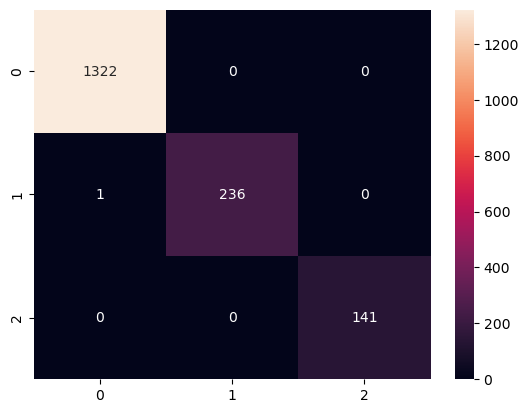

------------------------------
test_data
f1_score : 0.85715
accuracy : 0.92723


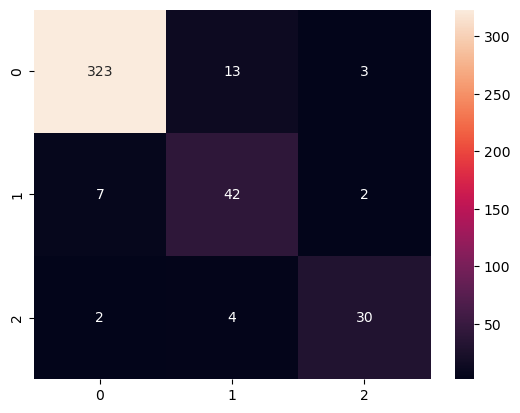

In [4]:
print('train_data')
f1_train = round(f1_score(hxFn(x)+[1],y_train,average='macro'),5)
print(f'f1_score : {f1_train}')
acc_train = round(accuracy_score(hxFn(x)+[1],y_train),5)
print(f'accuracy : {acc_train}')
sns.heatmap(
    confusion_matrix(hxFn(x)+[1],y_train),
    annot=True,
    fmt='d'
)
plt.show()
print('-'*30)
print('test_data')

x_test_tensor = tf.constant(x_test,tf.float32)

f1_test = round(f1_score(hxFn(x_test_tensor)+[1],y_test,average='macro'),5)
print(f'f1_score : {f1_test}')
acc_test = round(accuracy_score(hxFn(x_test_tensor)+[1],y_test),5)
print(f'accuracy : {acc_test}')
sns.heatmap(
    confusion_matrix(hxFn(x_test_tensor)+[1],y_test),
    annot=True,
    fmt='d'
)
plt.show()

In [5]:
# tensorflow high

import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_dim=(21)))
model.add(tf.keras.layers.Dense(32, activation='relu', input_dim=(64)))
model.add(tf.keras.layers.Dense(3, activation='softmax',input_dim=(32)))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc']
)

model.fit(x_train, y_trainOHE, epochs=10)

y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

Epoch 1/10
54/54 [==============================] - 2s 5ms/step - loss: 0.8576 - acc: 0.7388
Epoch 2/10
54/54 [==============================] - 0s 5ms/step - loss: 0.4386 - acc: 0.8435
Epoch 3/10
54/54 [==============================] - 0s 4ms/step - loss: 0.3504 - acc: 0.8741
Epoch 4/10
54/54 [==============================] - 0s 4ms/step - loss: 0.3042 - acc: 0.8818
Epoch 5/10
54/54 [==============================] - 0s 3ms/step - loss: 0.2690 - acc: 0.8988
Epoch 6/10
54/54 [==============================] - 0s 4ms/step - loss: 0.2651 - acc: 0.9012
Epoch 7/10
54/54 [==============================] - 0s 4ms/step - loss: 0.2346 - acc: 0.9035
Epoch 8/10
54/54 [==============================] - 0s 4ms/step - loss: 0.2689 - acc: 0.9053
Epoch 9/10
54/54 [==============================] - 0s 4ms/step - loss: 0.2285 - acc: 0.9088
Epoch 10/10
14/14 [==============================] - 0s 3ms/step


train_data
f1_score : 0.85081
accuracy : 0.92176


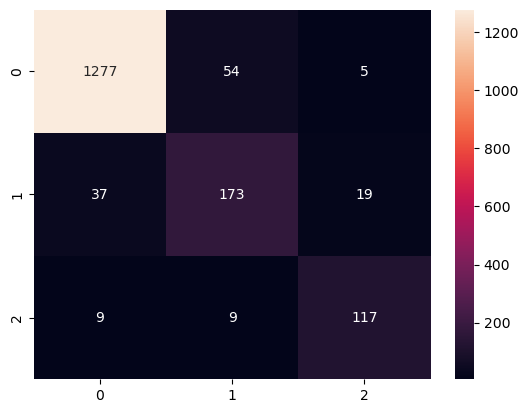

------------------------------
test_data
f1_score : 0.85623
accuracy : 0.92488


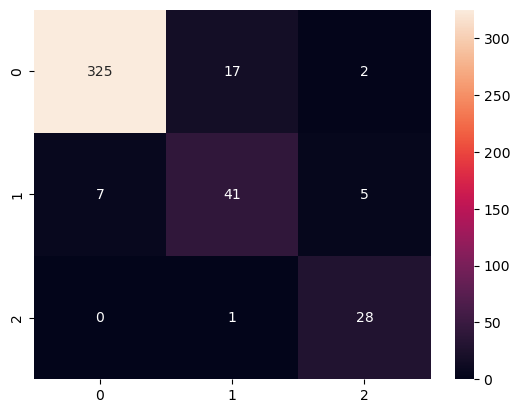

In [6]:
print('train_data')
f1_train = round(f1_score(y_train_pred.argmax(axis=1)+[1],y_train,average='macro'),5)
print(f'f1_score : {f1_train}')
acc_train = round(accuracy_score(y_train_pred.argmax(axis=1)+[1],y_train),5)
print(f'accuracy : {acc_train}')
sns.heatmap(
    confusion_matrix(y_train_pred.argmax(axis=1)+[1],y_train),
    annot=True,
    fmt='d'
)
plt.show()
print('-'*30)
print('test_data')
f1_test = round(f1_score(y_test_pred.argmax(axis=1)+[1],y_test,average='macro'),5)
print(f'f1_score : {f1_test}')
acc_test = round(accuracy_score(y_test_pred.argmax(axis=1)+[1],y_test),5)
print(f'accuracy : {acc_test}')
sns.heatmap(
    confusion_matrix(y_test_pred.argmax(axis=1)+[1],y_test),
    annot=True,
    fmt='d'
)
plt.show()

In [7]:
# torch_low
import torch
x = torch.FloatTensor(x_train.values)
y = torch.FloatTensor(y_trainOHE.values)

w1 = torch.empty( [21,64], requires_grad=True ) 
b1 = torch.empty( [64], requires_grad=True)
torch.nn.init.uniform_(w1)
torch.nn.init.uniform_(b1)

w2 = torch.empty( [64,32], requires_grad=True ) 
b2 = torch.empty( [32], requires_grad=True)
torch.nn.init.uniform_(w2)
torch.nn.init.uniform_(b2)

w3 = torch.empty( [32,3], requires_grad=True ) 
b3 = torch.empty( [3], requires_grad=True)
torch.nn.init.uniform_(w3)
torch.nn.init.uniform_(b3)

def cost():
    z1 = torch.matmul(x,w1) + b1
    x_hat_1 = torch.relu(z1)
    
    z2 = torch.matmul(x_hat_1,w2) + b2
    x_hat_2 = torch.relu(z2)
    
    z3 = torch.matmul(x_hat_2,w3) + b3
    c_i = torch.nn.functional.cross_entropy(z3,y)
    c = torch.mean(c_i)
    return c

def hxFn(x_data):
    xd = torch.FloatTensor(x_data)
    
    z1 = torch.matmul(x,w1) + b1
    x_hat_1 = torch.relu(z1)
    
    z2 = torch.matmul(x_hat_1,w2) + b2
    x_hat_2 = torch.relu(z2)
    
    z3 = torch.matmul(x_hat_2,w3) + b3
    hx = torch.softmax(z3,dim=1)
    return hx.detach().numpy().argmax(axis=1)


optimizer = torch.optim.Adam( [w1,w2,w3,b1,b2,b3], lr=0.01)
for epoch in range(1000):
    c = cost()
    optimizer.zero_grad()
    c.backward()
    temp=accuracy_score(hxFn(x)+[1],y_train)
    optimizer.step()
    print(f'{epoch}','cost', c.item(), f'acc : => {temp}' )

0 cost 80.32781982421875 acc : => 0.22
1 cost 25.011674880981445 acc : => 0.7776470588235294
2 cost 27.907747268676758 acc : => 0.778235294117647
3 cost 24.00710678100586 acc : => 0.778235294117647
4 cost 16.141204833984375 acc : => 0.7835294117647059
5 cost 48.06368637084961 acc : => 0.19058823529411764
6 cost 34.557289123535156 acc : => 0.2011764705882353
7 cost 14.048689842224121 acc : => 0.7776470588235294
8 cost 17.15987777709961 acc : => 0.7829411764705883
9 cost 17.69994354248047 acc : => 0.7788235294117647
10 cost 16.08395004272461 acc : => 0.7776470588235294
11 cost 12.74551773071289 acc : => 0.7717647058823529
12 cost 8.924760818481445 acc : => 0.7588235294117647
13 cost 13.208715438842773 acc : => 0.4717647058823529
14 cost 14.028448104858398 acc : => 0.4470588235294118
15 cost 7.861822605133057 acc : => 0.7076470588235294
16 cost 7.637277603149414 acc : => 0.7758823529411765
17 cost 7.882760047912598 acc : => 0.7735294117647059
18 cost 7.298867702484131 acc : => 0.777647058

159 cost 0.7218162417411804 acc : => 0.8788235294117647
160 cost 0.6453156471252441 acc : => 0.8576470588235294
161 cost 1.2875151634216309 acc : => 0.8023529411764706
162 cost 0.5793648362159729 acc : => 0.8594117647058823
163 cost 0.7620850205421448 acc : => 0.8782352941176471
164 cost 1.1684646606445312 acc : => 0.8717647058823529
165 cost 1.2457154989242554 acc : => 0.8705882352941177
166 cost 1.0094146728515625 acc : => 0.8770588235294118
167 cost 0.4896610677242279 acc : => 0.8847058823529412
168 cost 0.8849170207977295 acc : => 0.8476470588235294
169 cost 0.9402720928192139 acc : => 0.8435294117647059
170 cost 0.583943784236908 acc : => 0.8629411764705882
171 cost 0.5847868323326111 acc : => 0.8858823529411765
172 cost 1.1806973218917847 acc : => 0.8594117647058823
173 cost 0.7218250036239624 acc : => 0.8605882352941177
174 cost 0.5926471948623657 acc : => 0.8552941176470589
175 cost 1.038684368133545 acc : => 0.8458823529411764
176 cost 0.6285402774810791 acc : => 0.86764705882

320 cost 0.3305732011795044 acc : => 0.8905882352941177
321 cost 0.45891234278678894 acc : => 0.8735294117647059
322 cost 0.5135700106620789 acc : => 0.8752941176470588
323 cost 0.29998621344566345 acc : => 0.9041176470588236
324 cost 0.982357919216156 acc : => 0.8523529411764705
325 cost 0.390783429145813 acc : => 0.8917647058823529
326 cost 0.6183962225914001 acc : => 0.8688235294117647
327 cost 0.5870805978775024 acc : => 0.8776470588235294
328 cost 0.28928929567337036 acc : => 0.9035294117647059
329 cost 0.5254771709442139 acc : => 0.8664705882352941
330 cost 0.4961605966091156 acc : => 0.8935294117647059
331 cost 0.4636496901512146 acc : => 0.8952941176470588
332 cost 0.4317547380924225 acc : => 0.8852941176470588
333 cost 0.3770112991333008 acc : => 0.888235294117647
334 cost 0.4202454388141632 acc : => 0.8970588235294118
335 cost 0.44704410433769226 acc : => 0.8947058823529411
336 cost 0.4029305577278137 acc : => 0.8835294117647059
337 cost 0.27580830454826355 acc : => 0.9041176

488 cost 0.4364301264286041 acc : => 0.8858823529411765
489 cost 0.3511752188205719 acc : => 0.8941176470588236
490 cost 0.2392157018184662 acc : => 0.9158823529411765
491 cost 0.3050677478313446 acc : => 0.92
492 cost 0.2747799754142761 acc : => 0.9076470588235294
493 cost 0.20503132045269012 acc : => 0.9176470588235294
494 cost 0.4531697630882263 acc : => 0.898235294117647
495 cost 0.36290210485458374 acc : => 0.8929411764705882
496 cost 0.39136800169944763 acc : => 0.8847058823529412
497 cost 0.26668480038642883 acc : => 0.918235294117647
498 cost 0.3547389805316925 acc : => 0.8958823529411765
499 cost 0.37157148122787476 acc : => 0.908235294117647
500 cost 0.42632946372032166 acc : => 0.9023529411764706
501 cost 0.2452860325574875 acc : => 0.9152941176470588
502 cost 0.4939201772212982 acc : => 0.8735294117647059
503 cost 0.2687593996524811 acc : => 0.9088235294117647
504 cost 0.3326832354068756 acc : => 0.9164705882352941
505 cost 0.345509797334671 acc : => 0.9170588235294118
506 

638 cost 0.23659157752990723 acc : => 0.9288235294117647
639 cost 0.20352984964847565 acc : => 0.9329411764705883
640 cost 0.16596511006355286 acc : => 0.9270588235294117
641 cost 0.25851568579673767 acc : => 0.9094117647058824
642 cost 0.3928256332874298 acc : => 0.8941176470588236
643 cost 0.3987482190132141 acc : => 0.8952941176470588
644 cost 0.1991032510995865 acc : => 0.9317647058823529
645 cost 0.3611893951892853 acc : => 0.8970588235294118
646 cost 0.249269038438797 acc : => 0.93
647 cost 0.3942211866378784 acc : => 0.9088235294117647
648 cost 0.25106173753738403 acc : => 0.9317647058823529
649 cost 0.28773972392082214 acc : => 0.9058823529411765
650 cost 0.27957990765571594 acc : => 0.9058823529411765
651 cost 0.21926797926425934 acc : => 0.9270588235294117
652 cost 0.2581678628921509 acc : => 0.9311764705882353
653 cost 0.2116159349679947 acc : => 0.9335294117647058
654 cost 0.18458837270736694 acc : => 0.9264705882352942
655 cost 0.21328723430633545 acc : => 0.92294117647058

790 cost 0.2808285057544708 acc : => 0.9123529411764706
791 cost 0.17112065851688385 acc : => 0.9358823529411765
792 cost 0.3258177936077118 acc : => 0.9041176470588236
793 cost 0.1964777261018753 acc : => 0.941764705882353
794 cost 0.3316815197467804 acc : => 0.9252941176470588
795 cost 0.26505714654922485 acc : => 0.9370588235294117
796 cost 0.2109447568655014 acc : => 0.9276470588235294
797 cost 0.3154986798763275 acc : => 0.8988235294117647
798 cost 0.1877511590719223 acc : => 0.9341176470588235
799 cost 0.24066554009914398 acc : => 0.9329411764705883
800 cost 0.22781440615653992 acc : => 0.93
801 cost 0.14461509883403778 acc : => 0.941764705882353
802 cost 0.33391889929771423 acc : => 0.92
803 cost 0.2274724394083023 acc : => 0.9158823529411765
804 cost 0.3212944567203522 acc : => 0.9023529411764706
805 cost 0.1659265160560608 acc : => 0.9388235294117647
806 cost 0.3977784216403961 acc : => 0.9052941176470588
807 cost 0.15876543521881104 acc : => 0.9447058823529412
808 cost 0.2580

942 cost 0.12803447246551514 acc : => 0.9441176470588235
943 cost 0.13408614695072174 acc : => 0.9452941176470588
944 cost 0.1844864785671234 acc : => 0.9258823529411765
945 cost 0.17371787130832672 acc : => 0.9317647058823529
946 cost 0.13319268822669983 acc : => 0.9423529411764706
947 cost 0.12500791251659393 acc : => 0.9458823529411765
948 cost 0.13129526376724243 acc : => 0.95
949 cost 0.13416944444179535 acc : => 0.9494117647058824
950 cost 0.12709416449069977 acc : => 0.9452941176470588
951 cost 0.12530310451984406 acc : => 0.9464705882352941
952 cost 0.12312952429056168 acc : => 0.9552941176470588
953 cost 0.13150198757648468 acc : => 0.951764705882353
954 cost 0.1228322982788086 acc : => 0.9529411764705882
955 cost 0.12799397110939026 acc : => 0.9505882352941176
956 cost 0.16507193446159363 acc : => 0.9382352941176471
957 cost 0.14466144144535065 acc : => 0.9452941176470588
958 cost 0.1649668961763382 acc : => 0.9329411764705883
959 cost 0.1436263918876648 acc : => 0.9558823529

train_data
f1_score : 0.92117
accuracy : 0.95176


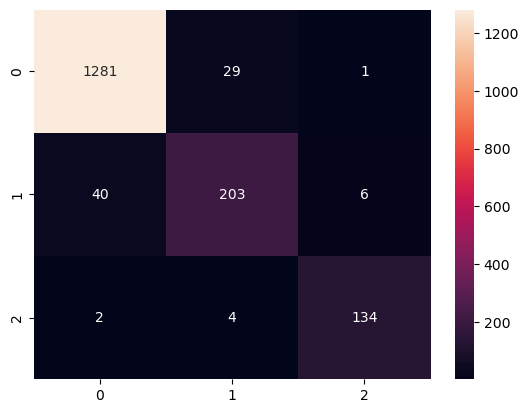

------------------------------
test_data
f1_score : 0.92117
accuracy : 0.95176


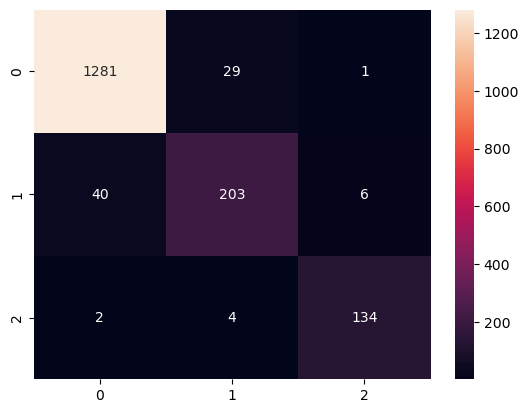

------------------------------
test_data


In [8]:
print('train_data')
f1_train = round(f1_score(hxFn(x)+[1],y_train,average='macro'),5)
print(f'f1_score : {f1_train}')
acc_train = round(accuracy_score(hxFn(x)+[1],y_train),5)
print(f'accuracy : {acc_train}')
sns.heatmap(
    confusion_matrix(hxFn(x)+[1],y_train),
    annot=True,
    fmt='d'
)
plt.show()
print('-'*30)
print('test_data')
f1_train = round(f1_score(hxFn(x_test.values)+[1],y_train,average='macro'),5)
print(f'f1_score : {f1_train}')
acc_train = round(accuracy_score(hxFn(x_test.values)+[1],y_train),5)
print(f'accuracy : {acc_train}')
sns.heatmap(
    confusion_matrix(hxFn(x_test.values)+[1],y_train),
    annot=True,
    fmt='d'
)
plt.show()
print('-'*30)
print('test_data')

In [9]:
# torch_high based on class
import torch
from torch.optim import Adam
from torch.nn import Linear, Sequential, Module, CrossEntropyLoss, Softmax, ReLU
class MultiClass(Module):
    """
    mutli_classification
    fashion_mnist => flatten (28*28)
    (28*28) => (128)
    (128) => (64)
    (64) => (10)
    """
    def __init__(self) -> None:
        super().__init__()    
        self.nn1 = Linear(21,64)
        self.nn2 = Linear(64,32)
        self.nn3 = Linear(32,3)
        self.relu1 = ReLU()
        self.relu2 = ReLU()
        self.sm1 = Softmax(dim=1)
    def forward(self, x):
        x = self.nn1(x)
        x = self.relu1(x)
        
        x = self.nn2(x)
        x = self.relu1(x)
        
        x = self.nn3(x)
        x = self.sm1(x)
        return x
    
x_train_tensor = torch.FloatTensor(x_train.values)
x_test_tensor = torch.FloatTensor(x_test.values)

y_train_tensor = torch.FloatTensor(y_trainOHE.values)
y_test_tensor = torch.FloatTensor(y_testOHE.values)


model = MultiClass()
loss_fn = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr = 1e-3)

for epoch in range(2000):
    optimizer.zero_grad()
    x_hat = model(x_train_tensor)
    cost = loss_fn(x_hat,y_train_tensor)
    cost.backward()
    optimizer.step()
    acc = accuracy_score(
        x_hat.argmax(axis=1).detach().numpy(),
        y_train_tensor.argmax(axis=1).detach().numpy()
    )
    print(f'epoch => {epoch} / cost => {cost.item()} / acc => {acc}')

epoch => 0 / cost => 1.1038246154785156 / acc => 0.10352941176470588
epoch => 1 / cost => 1.0993198156356812 / acc => 0.12294117647058823
epoch => 2 / cost => 1.0948313474655151 / acc => 0.1323529411764706
epoch => 3 / cost => 1.0903379917144775 / acc => 0.1411764705882353
epoch => 4 / cost => 1.0858067274093628 / acc => 0.16647058823529412
epoch => 5 / cost => 1.081228494644165 / acc => 0.21941176470588236
epoch => 6 / cost => 1.0765782594680786 / acc => 0.31411764705882356
epoch => 7 / cost => 1.071858286857605 / acc => 0.4229411764705882
epoch => 8 / cost => 1.0670503377914429 / acc => 0.5294117647058824
epoch => 9 / cost => 1.0621445178985596 / acc => 0.6358823529411765
epoch => 10 / cost => 1.057119607925415 / acc => 0.7047058823529412
epoch => 11 / cost => 1.0519635677337646 / acc => 0.741764705882353
epoch => 12 / cost => 1.046668529510498 / acc => 0.7623529411764706
epoch => 13 / cost => 1.0412205457687378 / acc => 0.7694117647058824
epoch => 14 / cost => 1.0356149673461914 / a

epoch => 128 / cost => 0.7191593050956726 / acc => 0.8352941176470589
epoch => 129 / cost => 0.7188100814819336 / acc => 0.8347058823529412
epoch => 130 / cost => 0.7184705138206482 / acc => 0.8352941176470589
epoch => 131 / cost => 0.7181406021118164 / acc => 0.8352941176470589
epoch => 132 / cost => 0.7178201079368591 / acc => 0.8352941176470589
epoch => 133 / cost => 0.717508852481842 / acc => 0.8358823529411765
epoch => 134 / cost => 0.7172055840492249 / acc => 0.8358823529411765
epoch => 135 / cost => 0.7169095277786255 / acc => 0.8370588235294117
epoch => 136 / cost => 0.7166203260421753 / acc => 0.8370588235294117
epoch => 137 / cost => 0.7163373231887817 / acc => 0.8376470588235294
epoch => 138 / cost => 0.7160603404045105 / acc => 0.8382352941176471
epoch => 139 / cost => 0.7157902717590332 / acc => 0.8382352941176471
epoch => 140 / cost => 0.7155261039733887 / acc => 0.8382352941176471
epoch => 141 / cost => 0.7152682542800903 / acc => 0.8382352941176471
epoch => 142 / cost =

epoch => 263 / cost => 0.6951786279678345 / acc => 0.8570588235294118
epoch => 264 / cost => 0.6950652003288269 / acc => 0.8570588235294118
epoch => 265 / cost => 0.6949520111083984 / acc => 0.8570588235294118
epoch => 266 / cost => 0.6948397159576416 / acc => 0.8570588235294118
epoch => 267 / cost => 0.694728434085846 / acc => 0.8564705882352941
epoch => 268 / cost => 0.6946171522140503 / acc => 0.8570588235294118
epoch => 269 / cost => 0.6945054531097412 / acc => 0.8576470588235294
epoch => 270 / cost => 0.6943936944007874 / acc => 0.8582352941176471
epoch => 271 / cost => 0.6942822337150574 / acc => 0.8582352941176471
epoch => 272 / cost => 0.6941715478897095 / acc => 0.8582352941176471
epoch => 273 / cost => 0.6940609812736511 / acc => 0.8582352941176471
epoch => 274 / cost => 0.6939499974250793 / acc => 0.8582352941176471
epoch => 275 / cost => 0.6938391923904419 / acc => 0.8582352941176471
epoch => 276 / cost => 0.6937288641929626 / acc => 0.8582352941176471
epoch => 277 / cost =

epoch => 393 / cost => 0.6787464618682861 / acc => 0.8770588235294118
epoch => 394 / cost => 0.678564727306366 / acc => 0.8776470588235294
epoch => 395 / cost => 0.6783825755119324 / acc => 0.8782352941176471
epoch => 396 / cost => 0.6782015562057495 / acc => 0.8776470588235294
epoch => 397 / cost => 0.6780219674110413 / acc => 0.8782352941176471
epoch => 398 / cost => 0.6778460144996643 / acc => 0.8788235294117647
epoch => 399 / cost => 0.6776743531227112 / acc => 0.8788235294117647
epoch => 400 / cost => 0.6775085926055908 / acc => 0.8794117647058823
epoch => 401 / cost => 0.6773507595062256 / acc => 0.88
epoch => 402 / cost => 0.6771977543830872 / acc => 0.8805882352941177
epoch => 403 / cost => 0.6770468354225159 / acc => 0.8805882352941177
epoch => 404 / cost => 0.6769002079963684 / acc => 0.8805882352941177
epoch => 405 / cost => 0.6767615675926208 / acc => 0.8805882352941177
epoch => 406 / cost => 0.6766282916069031 / acc => 0.8805882352941177
epoch => 407 / cost => 0.6764972805

epoch => 527 / cost => 0.6681756973266602 / acc => 0.8876470588235295
epoch => 528 / cost => 0.668133020401001 / acc => 0.8876470588235295
epoch => 529 / cost => 0.6680928468704224 / acc => 0.8876470588235295
epoch => 530 / cost => 0.6680500507354736 / acc => 0.8876470588235295
epoch => 531 / cost => 0.6680088043212891 / acc => 0.8876470588235295
epoch => 532 / cost => 0.6679684519767761 / acc => 0.8876470588235295
epoch => 533 / cost => 0.6679276823997498 / acc => 0.8876470588235295
epoch => 534 / cost => 0.6678869128227234 / acc => 0.8876470588235295
epoch => 535 / cost => 0.6678481698036194 / acc => 0.8876470588235295
epoch => 536 / cost => 0.667809009552002 / acc => 0.888235294117647
epoch => 537 / cost => 0.6677677035331726 / acc => 0.888235294117647
epoch => 538 / cost => 0.6677291989326477 / acc => 0.888235294117647
epoch => 539 / cost => 0.6676908731460571 / acc => 0.888235294117647
epoch => 540 / cost => 0.6676527261734009 / acc => 0.888235294117647
epoch => 541 / cost => 0.66

epoch => 658 / cost => 0.6641104817390442 / acc => 0.89
epoch => 659 / cost => 0.6640800833702087 / acc => 0.89
epoch => 660 / cost => 0.6640498638153076 / acc => 0.8894117647058823
epoch => 661 / cost => 0.6640188694000244 / acc => 0.8894117647058823
epoch => 662 / cost => 0.6639877557754517 / acc => 0.89
epoch => 663 / cost => 0.6639569401741028 / acc => 0.89
epoch => 664 / cost => 0.6639264225959778 / acc => 0.89
epoch => 665 / cost => 0.6638950705528259 / acc => 0.89
epoch => 666 / cost => 0.6638635993003845 / acc => 0.89
epoch => 667 / cost => 0.663832426071167 / acc => 0.89
epoch => 668 / cost => 0.6638014316558838 / acc => 0.89
epoch => 669 / cost => 0.6637703776359558 / acc => 0.89
epoch => 670 / cost => 0.6637400984764099 / acc => 0.89
epoch => 671 / cost => 0.6637089252471924 / acc => 0.89
epoch => 672 / cost => 0.6636779308319092 / acc => 0.89
epoch => 673 / cost => 0.6636468768119812 / acc => 0.89
epoch => 674 / cost => 0.6636160612106323 / acc => 0.89
epoch => 675 / cost =

epoch => 790 / cost => 0.660067617893219 / acc => 0.8935294117647059
epoch => 791 / cost => 0.6600467562675476 / acc => 0.8935294117647059
epoch => 792 / cost => 0.6600260734558105 / acc => 0.8935294117647059
epoch => 793 / cost => 0.6600046157836914 / acc => 0.8935294117647059
epoch => 794 / cost => 0.65998375415802 / acc => 0.8941176470588236
epoch => 795 / cost => 0.6599637269973755 / acc => 0.8941176470588236
epoch => 796 / cost => 0.6599416136741638 / acc => 0.8941176470588236
epoch => 797 / cost => 0.659920871257782 / acc => 0.8941176470588236
epoch => 798 / cost => 0.659900426864624 / acc => 0.8941176470588236
epoch => 799 / cost => 0.6598805785179138 / acc => 0.8941176470588236
epoch => 800 / cost => 0.6598608493804932 / acc => 0.8941176470588236
epoch => 801 / cost => 0.6598418354988098 / acc => 0.8941176470588236
epoch => 802 / cost => 0.6598218679428101 / acc => 0.8941176470588236
epoch => 803 / cost => 0.6598027348518372 / acc => 0.8941176470588236
epoch => 804 / cost => 0.

epoch => 921 / cost => 0.6577496528625488 / acc => 0.8947058823529411
epoch => 922 / cost => 0.6577408313751221 / acc => 0.8947058823529411
epoch => 923 / cost => 0.6577320694923401 / acc => 0.8947058823529411
epoch => 924 / cost => 0.6577235460281372 / acc => 0.8947058823529411
epoch => 925 / cost => 0.6577141284942627 / acc => 0.8947058823529411
epoch => 926 / cost => 0.6577046513557434 / acc => 0.8947058823529411
epoch => 927 / cost => 0.6576964855194092 / acc => 0.8947058823529411
epoch => 928 / cost => 0.6576868295669556 / acc => 0.8947058823529411
epoch => 929 / cost => 0.6576775908470154 / acc => 0.8947058823529411
epoch => 930 / cost => 0.6576688885688782 / acc => 0.8947058823529411
epoch => 931 / cost => 0.657660722732544 / acc => 0.8947058823529411
epoch => 932 / cost => 0.6576521992683411 / acc => 0.8947058823529411
epoch => 933 / cost => 0.6576436161994934 / acc => 0.8947058823529411
epoch => 934 / cost => 0.6576350927352905 / acc => 0.8947058823529411
epoch => 935 / cost =

epoch => 1050 / cost => 0.656935453414917 / acc => 0.8947058823529411
epoch => 1051 / cost => 0.6569308638572693 / acc => 0.8947058823529411
epoch => 1052 / cost => 0.6569260358810425 / acc => 0.8947058823529411
epoch => 1053 / cost => 0.6569225788116455 / acc => 0.8947058823529411
epoch => 1054 / cost => 0.6569175720214844 / acc => 0.8947058823529411
epoch => 1055 / cost => 0.6569127440452576 / acc => 0.8947058823529411
epoch => 1056 / cost => 0.6569071412086487 / acc => 0.8947058823529411
epoch => 1057 / cost => 0.6569039821624756 / acc => 0.8947058823529411
epoch => 1058 / cost => 0.6568993330001831 / acc => 0.8947058823529411
epoch => 1059 / cost => 0.6568926572799683 / acc => 0.8947058823529411
epoch => 1060 / cost => 0.6568888425827026 / acc => 0.8947058823529411
epoch => 1061 / cost => 0.656884491443634 / acc => 0.8947058823529411
epoch => 1062 / cost => 0.6568799018859863 / acc => 0.8947058823529411
epoch => 1063 / cost => 0.6568766236305237 / acc => 0.8947058823529411
epoch =>

epoch => 1179 / cost => 0.6554523706436157 / acc => 0.8958823529411765
epoch => 1180 / cost => 0.6554426550865173 / acc => 0.8958823529411765
epoch => 1181 / cost => 0.6554311513900757 / acc => 0.8958823529411765
epoch => 1182 / cost => 0.6554264426231384 / acc => 0.8958823529411765
epoch => 1183 / cost => 0.6554189920425415 / acc => 0.8958823529411765
epoch => 1184 / cost => 0.6554120182991028 / acc => 0.8958823529411765
epoch => 1185 / cost => 0.6554033160209656 / acc => 0.8958823529411765
epoch => 1186 / cost => 0.6553938388824463 / acc => 0.8958823529411765
epoch => 1187 / cost => 0.6553884148597717 / acc => 0.8958823529411765
epoch => 1188 / cost => 0.6553812623023987 / acc => 0.8958823529411765
epoch => 1189 / cost => 0.6553724408149719 / acc => 0.8958823529411765
epoch => 1190 / cost => 0.6553642749786377 / acc => 0.8958823529411765
epoch => 1191 / cost => 0.6553580164909363 / acc => 0.8958823529411765
epoch => 1192 / cost => 0.6553502678871155 / acc => 0.8958823529411765
epoch 

epoch => 1306 / cost => 0.6541533470153809 / acc => 0.8976470588235295
epoch => 1307 / cost => 0.6541486382484436 / acc => 0.8976470588235295
epoch => 1308 / cost => 0.6541435122489929 / acc => 0.8976470588235295
epoch => 1309 / cost => 0.6541397571563721 / acc => 0.8976470588235295
epoch => 1310 / cost => 0.6541334986686707 / acc => 0.8976470588235295
epoch => 1311 / cost => 0.6541318893432617 / acc => 0.8976470588235295
epoch => 1312 / cost => 0.6541293263435364 / acc => 0.8976470588235295
epoch => 1313 / cost => 0.6541217565536499 / acc => 0.8976470588235295
epoch => 1314 / cost => 0.6541193723678589 / acc => 0.8976470588235295
epoch => 1315 / cost => 0.6541173458099365 / acc => 0.8976470588235295
epoch => 1316 / cost => 0.6541123390197754 / acc => 0.8976470588235295
epoch => 1317 / cost => 0.6541125774383545 / acc => 0.8976470588235295
epoch => 1318 / cost => 0.6541074514389038 / acc => 0.8976470588235295
epoch => 1319 / cost => 0.6541024446487427 / acc => 0.8976470588235295
epoch 

epoch => 1435 / cost => 0.6533330678939819 / acc => 0.898235294117647
epoch => 1436 / cost => 0.6533336639404297 / acc => 0.898235294117647
epoch => 1437 / cost => 0.6533312797546387 / acc => 0.898235294117647
epoch => 1438 / cost => 0.6533242464065552 / acc => 0.898235294117647
epoch => 1439 / cost => 0.6533210873603821 / acc => 0.898235294117647
epoch => 1440 / cost => 0.6533200144767761 / acc => 0.898235294117647
epoch => 1441 / cost => 0.6533181667327881 / acc => 0.898235294117647
epoch => 1442 / cost => 0.6533144116401672 / acc => 0.898235294117647
epoch => 1443 / cost => 0.6533109545707703 / acc => 0.898235294117647
epoch => 1444 / cost => 0.6533092260360718 / acc => 0.898235294117647
epoch => 1445 / cost => 0.6533041596412659 / acc => 0.898235294117647
epoch => 1446 / cost => 0.6533041596412659 / acc => 0.898235294117647
epoch => 1447 / cost => 0.6533024311065674 / acc => 0.898235294117647
epoch => 1448 / cost => 0.6532993912696838 / acc => 0.898235294117647
epoch => 1449 / cost

epoch => 1561 / cost => 0.6530788540840149 / acc => 0.898235294117647
epoch => 1562 / cost => 0.6530770063400269 / acc => 0.898235294117647
epoch => 1563 / cost => 0.6530774831771851 / acc => 0.898235294117647
epoch => 1564 / cost => 0.6530747413635254 / acc => 0.898235294117647
epoch => 1565 / cost => 0.6530739665031433 / acc => 0.898235294117647
epoch => 1566 / cost => 0.6530724167823792 / acc => 0.898235294117647
epoch => 1567 / cost => 0.6530706286430359 / acc => 0.898235294117647
epoch => 1568 / cost => 0.6530676484107971 / acc => 0.898235294117647
epoch => 1569 / cost => 0.6530667543411255 / acc => 0.898235294117647
epoch => 1570 / cost => 0.6530662178993225 / acc => 0.898235294117647
epoch => 1571 / cost => 0.6530658602714539 / acc => 0.898235294117647
epoch => 1572 / cost => 0.6530635952949524 / acc => 0.898235294117647
epoch => 1573 / cost => 0.6530606746673584 / acc => 0.898235294117647
epoch => 1574 / cost => 0.6530596613883972 / acc => 0.898235294117647
epoch => 1575 / cost

epoch => 1688 / cost => 0.6529268622398376 / acc => 0.898235294117647
epoch => 1689 / cost => 0.6529262661933899 / acc => 0.898235294117647
epoch => 1690 / cost => 0.6529266238212585 / acc => 0.898235294117647
epoch => 1691 / cost => 0.6529241800308228 / acc => 0.898235294117647
epoch => 1692 / cost => 0.6529234647750854 / acc => 0.898235294117647
epoch => 1693 / cost => 0.652923583984375 / acc => 0.898235294117647
epoch => 1694 / cost => 0.6529217958450317 / acc => 0.898235294117647
epoch => 1695 / cost => 0.6529208421707153 / acc => 0.898235294117647
epoch => 1696 / cost => 0.6529198288917542 / acc => 0.898235294117647
epoch => 1697 / cost => 0.6529204845428467 / acc => 0.898235294117647
epoch => 1698 / cost => 0.6529178619384766 / acc => 0.898235294117647
epoch => 1699 / cost => 0.6529189944267273 / acc => 0.898235294117647
epoch => 1700 / cost => 0.6529165506362915 / acc => 0.898235294117647
epoch => 1701 / cost => 0.6529170274734497 / acc => 0.898235294117647
epoch => 1702 / cost 

epoch => 1815 / cost => 0.6528236865997314 / acc => 0.898235294117647
epoch => 1816 / cost => 0.6528205871582031 / acc => 0.898235294117647
epoch => 1817 / cost => 0.6528207063674927 / acc => 0.898235294117647
epoch => 1818 / cost => 0.6528231501579285 / acc => 0.898235294117647
epoch => 1819 / cost => 0.6528214812278748 / acc => 0.898235294117647
epoch => 1820 / cost => 0.6528183817863464 / acc => 0.898235294117647
epoch => 1821 / cost => 0.6528170108795166 / acc => 0.898235294117647
epoch => 1822 / cost => 0.65281742811203 / acc => 0.898235294117647
epoch => 1823 / cost => 0.6528186798095703 / acc => 0.898235294117647
epoch => 1824 / cost => 0.65281742811203 / acc => 0.898235294117647
epoch => 1825 / cost => 0.6528158187866211 / acc => 0.898235294117647
epoch => 1826 / cost => 0.6528163552284241 / acc => 0.898235294117647
epoch => 1827 / cost => 0.6528128385543823 / acc => 0.898235294117647
epoch => 1828 / cost => 0.6528129577636719 / acc => 0.898235294117647
epoch => 1829 / cost => 

epoch => 1943 / cost => 0.6527389883995056 / acc => 0.898235294117647
epoch => 1944 / cost => 0.6527391076087952 / acc => 0.898235294117647
epoch => 1945 / cost => 0.6527383327484131 / acc => 0.898235294117647
epoch => 1946 / cost => 0.6527381539344788 / acc => 0.898235294117647
epoch => 1947 / cost => 0.6527376174926758 / acc => 0.898235294117647
epoch => 1948 / cost => 0.6527376174926758 / acc => 0.898235294117647
epoch => 1949 / cost => 0.6527358293533325 / acc => 0.898235294117647
epoch => 1950 / cost => 0.6527354717254639 / acc => 0.898235294117647
epoch => 1951 / cost => 0.65273517370224 / acc => 0.898235294117647
epoch => 1952 / cost => 0.6527356505393982 / acc => 0.898235294117647
epoch => 1953 / cost => 0.6527358293533325 / acc => 0.898235294117647
epoch => 1954 / cost => 0.6527355313301086 / acc => 0.898235294117647
epoch => 1955 / cost => 0.652734100818634 / acc => 0.898235294117647
epoch => 1956 / cost => 0.6527323722839355 / acc => 0.898235294117647
epoch => 1957 / cost =>

train_data
f1_score : 0.59983
accuracy : 0.89824


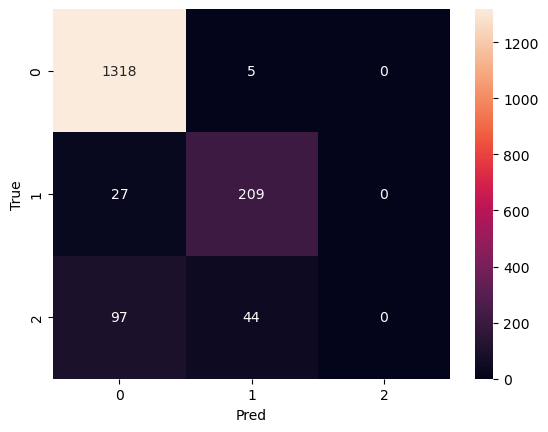

------------------------------
test_data
f1_score : 0.56061
accuracy : 0.8662


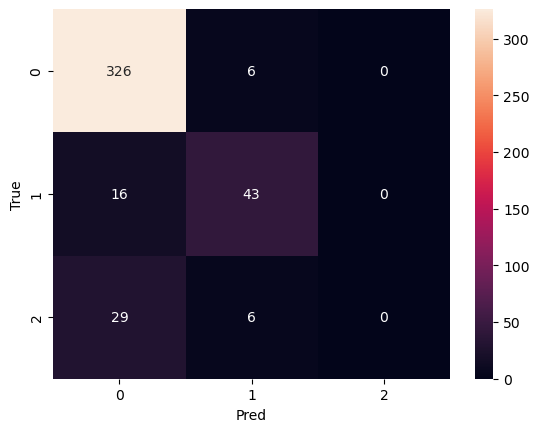

------------------------------


In [10]:
print('train_data')
f1_train = round(f1_score(x_hat.argmax(axis=1).detach().numpy()+[1],y_train,average='macro'),5)
print(f'f1_score : {f1_train}')
acc_train = round(accuracy_score(x_hat.argmax(axis=1).detach().numpy()+[1],y_train),5)
print(f'accuracy : {acc_train}')
sns.heatmap(
    confusion_matrix(y_train,x_hat.argmax(axis=1).detach().numpy()+[1]),
    annot=True,
    fmt='d',
)
plt.ylabel('True')
plt.xlabel('Pred')
plt.show()
print('-'*30)
x_hat_test = model(x_test_tensor)
print('test_data')
f1_test = round(f1_score(x_hat_test.argmax(axis=1).detach().numpy()+[1],y_test,average='macro'),5)
print(f'f1_score : {f1_test}')
acc_test = round(accuracy_score(x_hat_test.argmax(axis=1).detach().numpy()+[1],y_test),5)
print(f'accuracy : {acc_test}')
sns.heatmap(
    confusion_matrix(y_test,x_hat_test.argmax(axis=1).detach().numpy()+[1]),
    annot=True,
    fmt='d',
)
plt.ylabel('True')
plt.xlabel('Pred')
plt.show()
print('-'*30)